# SMAI (CSE 471) Spring 2019 Assignment 3
# Name : Manojit Chakraborty
# Roll : 2018201032

## Question 1 : Problem of anomaly detection: You are given the dataset of network user activity, and the task is to classify each user activity as normal or an attack. Attacks are also categorized as follows - 
- Denial of Service (dos): Intruder tries to consume server resources as much as
possible, so that normal users can’t get resources they need.
- Remote to Local (r2l): Intruder has no legitimate access to victim machine but
tries to gain access.
- User to Root (u2r): Intruder has limited privilege access to victim machine but
tries to get root privilege.
- Probe: Intruder tries to gain some information about victim machine.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [4]:
list(df["xAttack"]).count("u2r")

10

## 1.1 Part1 : Do dimensionality reduction using PCA on given dataset. Keep the tolerance of 10% (knee method), meaning reconstruction of the original data from the reduced dimensions in PCA space can be done with 10% error.

### Using PCA of Scikit-learn

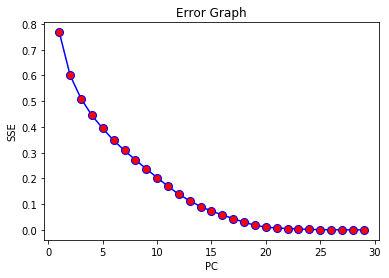

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_array_almost_equal
Xtrain=df.iloc[:,0:-1].values
Xtrain = StandardScaler().fit_transform(Xtrain)
l=[]
for i in range(1,30):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(Xtrain)
    X_projected = pca.inverse_transform(principalComponents)
    loss = ((Xtrain - X_projected) ** 2).mean()
    l.append(loss)
n=30
plt.title('Error Graph')
plt.xlabel('PC')
plt.ylabel('SSE')
plt.plot(list(range(1,n)),l,color='blue', marker='o',markerfacecolor='red', markersize=8)

### Using Own PCA Algorithm

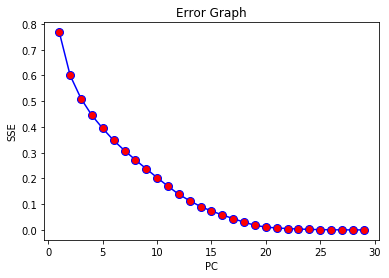

In [7]:
import pca
pca.pca(df)

### Here we can see that Reconstruction Error is nearly 10% only when the number of principal components is 14. So, for the whole assignment, we are taking 14 Principal Components.

## 1.2 Part 2 :  Use the reduced dimensions from the first part and perform Kmeans clustering with k equal to five(number of classes in the data). Also calculate the purity of clusters with given class label.

### Using own Kmeans Clustering Code :

Reconstruction Error : [0.09068097478550108]
Number of elements in Cluster 0 : 6916
Number of elements in Cluster 1 : 2958
Number of elements in Cluster 2 : 1789
Number of elements in Cluster 3 : 1058
Number of elements in Cluster 4 : 12277
Cluster 0 Purity
0.9839502602660497


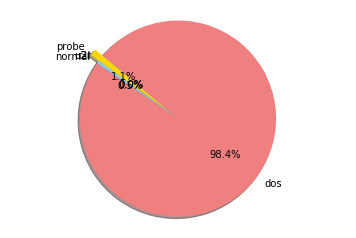

Cluster 1 Purity
0.46112237998647737


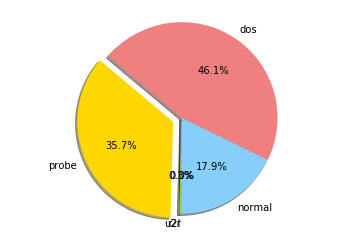

Cluster 2 Purity
0.7311347121296814


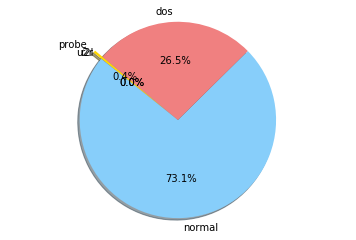

Cluster 3 Purity
0.775047258979206


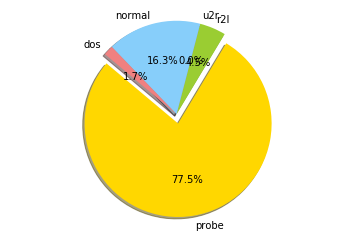

Cluster 4 Purity
0.922130813716706


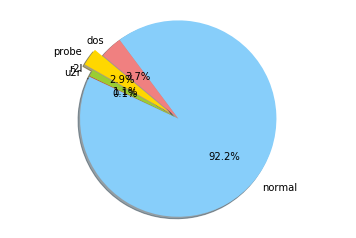

In [30]:
import kmeans
kmeans.run(df)

### Using Kmeans of Scikit-Learn 

Reconstruction Error : [0.09068097478541874]
Number of elements in Cluster 0 : 14092
Number of elements in Cluster 1 : 8
Number of elements in Cluster 2 : 6919
Number of elements in Cluster 3 : 2963
Number of elements in Cluster 4 : 1016
Cluster 0 Purity
0.8974595515185921


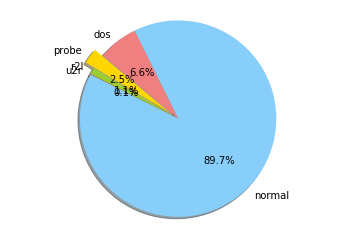

Cluster 1 Purity
1.0


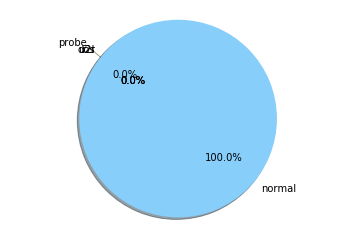

Cluster 2 Purity
0.9838126896950427


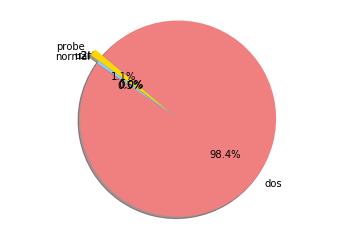

Cluster 3 Purity
0.4603442456969288


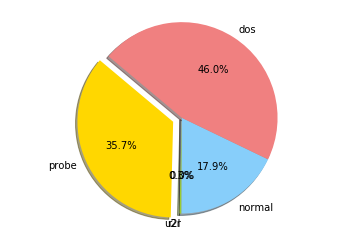

Cluster 4 Purity
0.8070866141732284


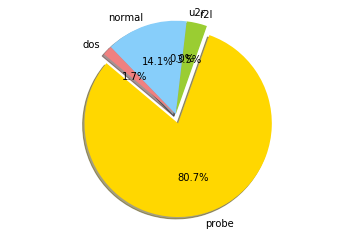

In [5]:
import kmeans
kmeans.run2(df)

## 1.3 Part 3 :  Perform GMM (with five Gaussian) on the reduced dimensions from first part and calculate the purity of clusters.

Reconstruction Error : [0.09068097478525872]
Number of elements in Cluster 0 : 1392
Number of elements in Cluster 1 : 6517
Number of elements in Cluster 2 : 6516
Number of elements in Cluster 3 : 10565
Number of elements in Cluster 4 : 8
Cluster 0 Purity
0.5222701149425287


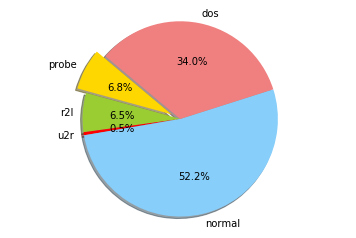

Cluster 1 Purity
1.0


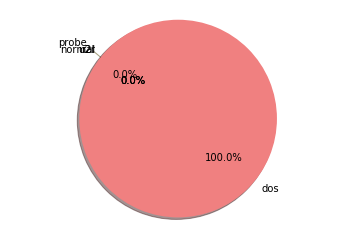

Cluster 2 Purity
0.42648864333947206


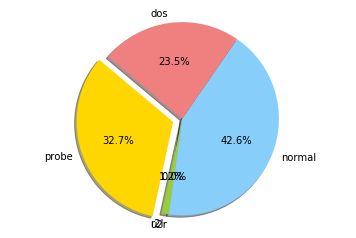

Cluster 3 Purity
0.9323237103644108


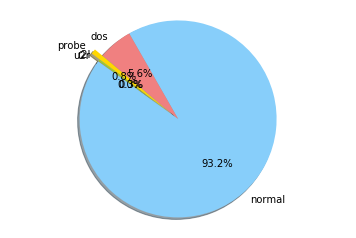

Cluster 4 Purity
1.0


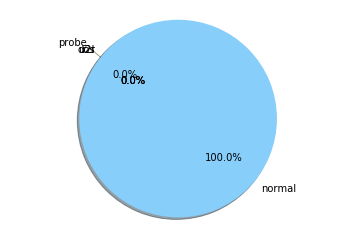

In [34]:
import kmeans
kmeans.run3(df)

## 1.4 Part 4 : Perform Hierarchical clustering with single-linkage and five clusters. Also calculate the purity of clusters. Create a pie chart comparing purity of different clustering methods you have tried for all classes.

Reconstruction Error : [0.09068097478521034]
14353
6854
2998
8
785
Number of elements in Cluster 0 : 14353
Number of elements in Cluster 1 : 6854
Number of elements in Cluster 2 : 2998
Number of elements in Cluster 3 : 8
Number of elements in Cluster 4 : 785
Cluster 0 Purity
0.8865045635058872


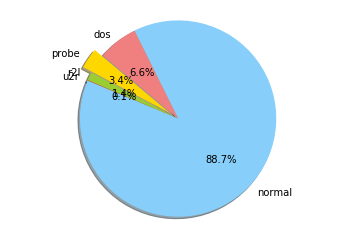

Cluster 1 Purity
0.9928508899912459


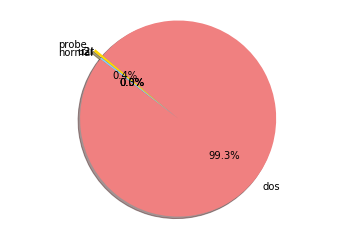

Cluster 2 Purity
0.4563042028018679


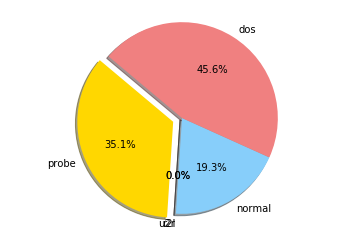

Cluster 3 Purity
1.0


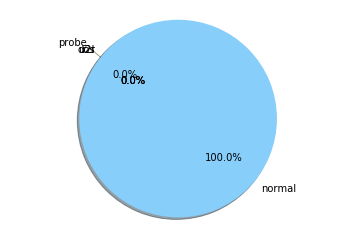

Cluster 4 Purity
0.956687898089172


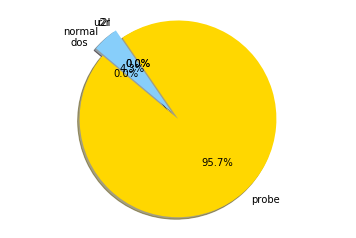

In [36]:
import kmeans
kmeans.run4(df)

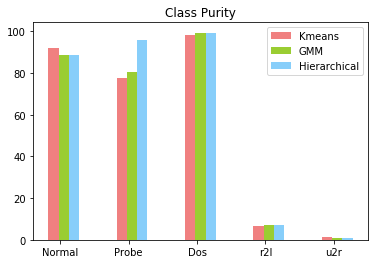

In [39]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
kmeans = (92.2,77.5,98.4, 6.6, 1.3)
fig, ax = plt.subplots()
ind = np.arange(N)    
width = 0.3         
p1 = ax.bar(ind, kmeans, width/2, color='lightcoral', bottom=0*cm)
gmm = (88.7, 80.7, 99,7,1)
p2 = ax.bar(ind + width/2, gmm, width/2,
            color='yellowgreen', bottom=0*cm)
gglo = (88.7, 95.7, 99.3,7,1)
p3 = ax.bar(ind + width, gglo, width/2,
            color='lightskyblue', bottom=0*cm)

ax.set_title('Class Purity')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels(('Normal', 'Probe', 'Dos', 'r2l', 'u2r'))

ax.legend((p1[0], p2[0],p3[0]), ('Kmeans', 'GMM',"Hierarchical"))
ax.yaxis.set_label("Percentage")
ax.autoscale_view()

plt.show()

## 1.5 Part 5 : Original data of network user activity is available here https://www.kaggle.com/what0919/intrusion-detection. Original data also contains categorical feature. If you were to do dimensionality reduction on original data, could you use PCA? Justify. Write a paragraph in report for your explanation/justification.
 

PCA is never a reliable option when we have categorical columns or features in our dataset. Basically, PCA finds and eliminate less informative (duplicate) information on feature set and reduce the dimension of feature space. In other words, imagine a N-dimensional hyperspace, PCA finds such M (M < N) features that the data variates most. In this way data may be represented as M-dimensional feature vectors. Mathematically, it is eigen-values & eigen vectors calculation of a feature space. So it boils down to calculating the eigenvectors of the covariance matrix, thus having binary data (e.g one-hot) or multiclass data, interpreting the distance to the mean from a binary point is ambiguous.
But it is not that we cannot use PCA in this original dataset. PCA can be applied on mixed data-type by following way :

- Make distance matrix using gower’s distance . 

- Then we can use this distance matrix to reduce dimension.

- This method is recommended only if we have small data-set of less than 10000 rows. But this data-set has 126,000 rows, then it’s better to do one hot encoding and then PCA or MULTIPLE CORRESPONDENCE ANALYSIS (MCA) rather than distance matrix because size of distance matrix will be (126,000 X 126,000), which will take forever for PCA to operate on.

However, for binary variables (a very specific class of categorical variables !), using PCA does make sense and is quite close to MCA results. We could consider the use of categorical PCA (CATPCA). Like PCA, CATPCA reduces a large number of variables to a smaller number of components. Each component is an uncorrelated combination of the original variables. In order to deal with non-numerical data CATPCA converts categories into numeric values through optimal scaling. The transformed variables (quantified) reflect the distance between different levels of ordinal variables or different categories of nominal variables that optimise the properties of the correlation matrix of the quantified variables.



## Part 2.1 : Implement logistic regression model to predict if the student will get admit.

### Taking 0.5 as the Threshold value at first :-

### Using own Logistic Regression Classifier :-

In [1]:
import logreg
logreg.run()

Vaidation Accuracy:  0.9555555555555556
[[ 0  0]
 [ 4 86]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98        90

   micro avg       0.96      0.96      0.96        90
   macro avg       0.50      0.48      0.49        90
weighted avg       1.00      0.96      0.98        90

0.9555555555555556
(array([0., 1.]), array([0.        , 0.95555556]), array([0.        , 0.97727273]), array([ 0, 90]))


### Using Scikit learn Logistic Regression :-

In [24]:
dataset=pd.read_csv('AdmissionDataset/data.csv')
X=dataset.iloc[:,1:8].values
Y=dataset.iloc[:,8].values
for i in range(0,len(Y)):
    if(Y[i]>=0.5):
        Y[i]=1
    else:
        Y[i]=0
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,average_precision_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[ 1  3]
 [ 2 84]]
              precision    recall  f1-score   support

         0.0       0.33      0.25      0.29         4
         1.0       0.97      0.98      0.97        86

   micro avg       0.94      0.94      0.94        90
   macro avg       0.65      0.61      0.63        90
weighted avg       0.94      0.94      0.94        90

0.9444444444444444


#### Here Accuracy score is very high, but Precision Recall and F1-Score is bad for Macro Avg. Now we will take 0.7 as threshold value, which is for this dataset, according to me, the best threshold value we can take. The reason is discussed in Part 4.3

### Using Own Classifier :

In [5]:
import logreg
logreg.run3()

Vaidation Accuracy:  0.8
[[33  8]
 [10 39]]
              precision    recall  f1-score   support

       False       0.77      0.80      0.79        41
        True       0.83      0.80      0.81        49

   micro avg       0.80      0.80      0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90

0.8
(array([0.76744186, 0.82978723]), array([0.80487805, 0.79591837]), array([0.78571429, 0.8125    ]), array([41, 49]))


### Using Scikit-Learn :

In [11]:
dataset=pd.read_csv('AdmissionDataset/data.csv')
X=dataset.iloc[:,1:8].values
Y=dataset.iloc[:,8].values
for i in range(0,len(Y)):
    if(Y[i]>=0.7):
        Y[i]=1
    else:
        Y[i]=0
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,average_precision_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[23  7]
 [ 6 54]]
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        30
         1.0       0.89      0.90      0.89        60

   micro avg       0.86      0.86      0.86        90
   macro avg       0.84      0.83      0.84        90
weighted avg       0.85      0.86      0.85        90

0.8555555555555555


### Here, Accuracy is a little bit low, but Precision, Recall and F1-Score is much higher, which is the most important part for a trained classifier

## Part 2.2 : Compare the performances of logistic regression model with KNN model on the Admission dataset

### Logistic Regression :

In [5]:
logreg.run()

Vaidation Accuracy:  0.9555555555555556
[[ 0  0]
 [ 4 86]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98        90

   micro avg       0.96      0.96      0.96        90
   macro avg       0.50      0.48      0.49        90
weighted avg       1.00      0.96      0.98        90

0.9555555555555556


### KNN :

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        45
           1       0.80      0.84      0.82        56

   micro avg       0.79      0.79      0.79       101
   macro avg       0.79      0.79      0.79       101
weighted avg       0.79      0.79      0.79       101

Using own KNN Algorithm ::
For k= 5 Validation Accurcy =  0.802


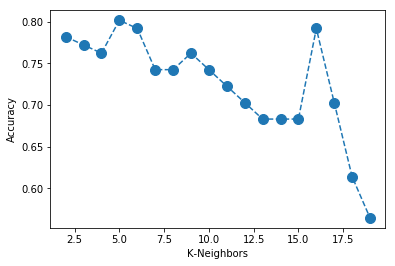

In [13]:
import knn_ad
knn_ad.run("euclid")

## Part 2.3 : Plot a graph explaining the co-relation between threshold value vs precision and recall. Report the criteria one should use while deciding the threshold value. Explain the reason behind your choice of threshold in your model

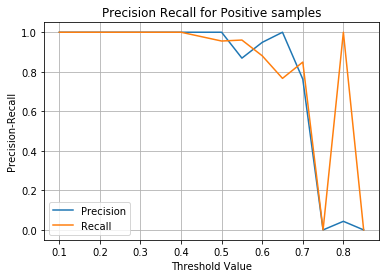

In [17]:
import logreg
import numpy as np
rec=[]
pre=[]
thre=np.arange(0.1,0.9,0.05)
for i in np.arange(0.1,0.9,0.05):
    p,r=logreg.run2(i)
    if(len(p)==2):
        #a=(p[0]+p[1])/2
        a=p[1]
        pre.append(a)
    else:
        pre.append(p)
    if(len(r)==2):
        #b=(r[0]+r[1])/2
        b=r[1]
        rec.append(b)
    else:
        rec.append(r)
        
    
import matplotlib.pyplot as plt
plt.plot(thre,pre,label="Precision")
plt.plot(thre,rec,label="Recall")
plt.xlabel("Threshold Value")
plt.ylabel("Precision-Recall")
plt.legend(loc="best")
plt.title("Precision Recall for Positive samples")
plt.grid(True)
plt.show()

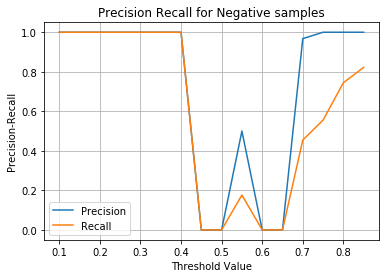

In [18]:
import logreg
import numpy as np
rec=[]
pre=[]
thre=np.arange(0.1,0.9,0.05)
for i in np.arange(0.1,0.9,0.05):
    p,r=logreg.run2(i)
    if(len(p)==2):
        #a=(p[0]+p[1])/2
        a=p[0]
        pre.append(a)
    else:
        pre.append(p)
    if(len(r)==2):
        #b=(r[0]+r[1])/2
        b=r[0]
        rec.append(b)
    else:
        rec.append(r)
        
    
import matplotlib.pyplot as plt
plt.plot(thre,pre,label="Precision")
plt.plot(thre,rec,label="Recall")
plt.xlabel("Threshold Value")
plt.ylabel("Precision-Recall")
plt.legend(loc="best")
plt.title("Precision Recall for Negative samples")
plt.grid(True)
plt.show()

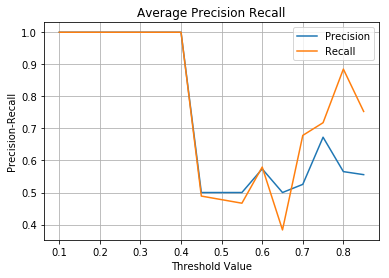

In [21]:
import logreg
import numpy as np
rec=[]
pre=[]
thre=np.arange(0.1,0.9,0.05)
for i in np.arange(0.1,0.9,0.05):
    p,r=logreg.run2(i)
    if(len(p)==2):
        a=(p[0]+p[1])/2
        #a=p[0]
        pre.append(a)
    else:
        pre.append(p)
    if(len(r)==2):
        b=(r[0]+r[1])/2
        #b=r[0]
        rec.append(b)
    else:
        rec.append(r)
        
    
import matplotlib.pyplot as plt
plt.plot(thre,pre,label="Precision")
plt.plot(thre,rec,label="Recall")
plt.xlabel("Threshold Value")
plt.ylabel("Precision-Recall")
plt.legend(loc="best")
plt.title("Average Precision Recall")
plt.grid(True)
plt.show()

### Observtions :
For Values 0.1 to 0.4, there are only negative samples in the dataset, so the Precision, Recall Value doesn't make any sense for them, whether they are good or bad. We have both Positive and Negative Samples from the value 0.5 to 0.8. Among those, the best Threshold Value that I can think is 0.7, because for 0.7, Precision and Recall value for both positive and negative samples are higher that other thresholds. So, for me, 0.7 sets the best threshold value for this dataset.  

## Part 3. Implement logistic regression using One vs All and One vs One approaches. Use the following dataset http://preon.iiit.ac.in/~sanjoy_chowdhury/wine-quality.zip for completing the task. Report your observations and accuracy of the model.

### Using own OneVsRestClassifier

In [1]:
import logreg_ovr
logreg_ovr.run()

Vaidation Accuracy:  0.5235934664246824
[[   1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0]
 [   5   86  700  386   40    2    0]
 [  11   62  610 1589  728  146    3]
 [   0    1    1   12   17    5    2]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           3       0.06      1.00      0.11         1
           4       0.01      1.00      0.01         1
           5       0.53      0.57      0.55      1219
           6       0.80      0.50      0.62      3149
           7       0.02      0.45      0.04        38
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.52      0.52      0.52      4408
   macro avg       0.20      0.50      0.19      4408
weighted avg       0.72      0.52      0.60      4408

0.5235934664246824


### Using Scikit-learn

In [6]:
dataset=pd.read_csv('wine-quality/data.csv',sep=";")
X=dataset.iloc[:,0:11]
Y=dataset.iloc[:,11]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
classifier=OneVsRestClassifier(LogisticRegression(random_state=0))
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,average_precision_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[  0   0   2   2   0   0   0]
 [  0   0  16  14   1   0   0]
 [  0   0 130 140   0   0   0]
 [  0   0  60 307   3   0   0]
 [  0   0   4 154  10   0   0]
 [  0   0   0  33   5   0   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        31
           5       0.61      0.48      0.54       270
           6       0.47      0.83      0.60       370
           7       0.53      0.06      0.11       168
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

   micro avg       0.51      0.51      0.51       882
   macro avg       0.23      0.20      0.18       882
weighted avg       0.49      0.51      0.44       882

0.5068027210884354


### Using own OneVsOneClassifier

In [2]:
import logreg_ovo
logreg_ovo.run()

Vaidation Accuracy:  0.5011337868480725
[[  0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  3  15  91  42   6   1   0]
 [  1  12 171 349 147  40   1]
 [  0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.07      1.00      0.13         2
           5       0.35      0.58      0.43       158
           6       0.89      0.48      0.63       721
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50       882
   macro avg       0.19      0.29      0.17       882
weighted avg       0.79      0.50      0.59       882

0.5011337868480725


### Using Scikit-learn

In [5]:
dataset=pd.read_csv('wine-quality/data.csv',sep=";")
X=dataset.iloc[:,0:11]
Y=dataset.iloc[:,11]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
classifier=OneVsOneClassifier(LogisticRegression(random_state=0))
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,average_precision_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[  0   0   2   2   0   0   0]
 [  0   0  19  12   0   0   0]
 [  0   0 138 131   1   0   0]
 [  0   0  56 297  17   0   0]
 [  0   0   7 140  21   0   0]
 [  0   0   0  29   9   0   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        31
           5       0.62      0.51      0.56       270
           6       0.49      0.80      0.60       370
           7       0.44      0.12      0.19       168
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

   micro avg       0.52      0.52      0.52       882
   macro avg       0.22      0.21      0.19       882
weighted avg       0.48      0.52      0.46       882

0.5170068027210885
